In [123]:
import pandas as pd

train_url = "train.csv"
train = pd.read_csv(train_url)

test_url = "test.csv"
test = pd.read_csv(test_url)

print(train.head())
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [125]:
train["Age"] = train["Age"].fillna(train["Age"].median())

In [126]:

# Passengers that survived vs passengers that passed away
print(train["Survived"].value_counts())

# As proportions
print(train["Survived"].value_counts(normalize=True))

# Males that survived vs males that passed away
print(train['Survived'][train.Sex=='male'].value_counts())

# Females that survived vs Females that passed away
print(train['Survived'][train.Sex=='female'].value_counts())

# Normalized male survival
print(train['Survived'][train.Sex=='male'].value_counts(normalize=True))

# Normalized female survival
print(train['Survived'][train.Sex=='female'].value_counts(normalize=True,sort=False))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64
0    468
1    109
Name: Survived, dtype: int64
1    233
0     81
Name: Survived, dtype: int64
0    0.811092
1    0.188908
Name: Survived, dtype: float64
0    0.257962
1    0.742038
Name: Survived, dtype: float64


In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

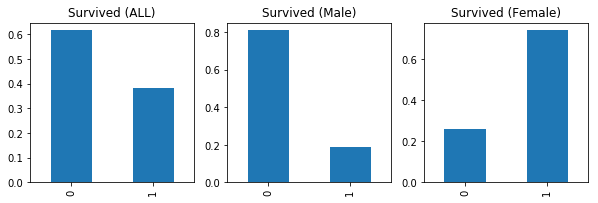

In [128]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 3)
plt.subplot2grid(fig_dims, (0, 0))
train["Survived"].value_counts(normalize=True).plot(kind='bar',title='Survived (ALL)')
plt.subplot2grid(fig_dims, (0, 1))
train['Survived'][train.Sex=='male'].value_counts(normalize=True).plot(kind='bar',title='Survived (Male)')
plt.subplot2grid(fig_dims, (0,2))
train['Survived'][train.Sex=='female'].value_counts(normalize=True,sort=False).plot(kind='bar',title='Survived (Female)')

In [129]:
train["Child"] = float('NaN')

train['Child'][train.Age<18] = 1
train['Child'][train.Age>=18] = 0
print(train['Child'].head(3))

print(train["Survived"][train["Child"] == 1].value_counts(normalize = True))

print(train["Survived"][train["Child"] == 0].value_counts(normalize = True))

0    0.0
1    0.0
2    0.0
Name: Child, dtype: float64
1    0.539823
0    0.460177
Name: Survived, dtype: float64
0    0.638817
1    0.361183
Name: Survived, dtype: float64


C:\Users\Ritik\AppData\Local\conda\conda\envs\dpd\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ritik\AppData\Local\conda\conda\envs\dpd\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


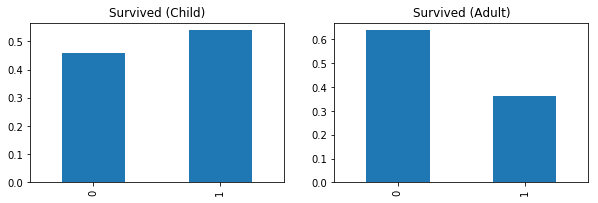

In [130]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)
plt.subplot2grid(fig_dims, (0, 0))
train["Survived"][train["Child"] == 1].value_counts(normalize = True,sort=False).plot(kind='bar',title='Survived (Child)')
plt.subplot2grid(fig_dims, (0, 1))
train["Survived"][train["Child"] == 0].value_counts(normalize = True).plot(kind='bar',title='Survived (Adult)')

In [131]:
import numpy as np
from sklearn import tree

In [132]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

train["Embarked"] = train['Embarked'].fillna('S')

train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

print(train['Sex'].head())
print(train['Embarked'].head())

C:\Users\Ritik\AppData\Local\conda\conda\envs\dpd\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ritik\AppData\Local\conda\conda\envs\dpd\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ritik\AppData\Local\conda\conda\envs\dpd\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ritik\AppData\

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: object
0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: object


C:\Users\Ritik\AppData\Local\conda\conda\envs\dpd\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [133]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Child          891 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB
None


In [134]:
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

[0.12231561 0.31274009 0.22585342 0.33909088]
0.9775533108866442


In [135]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [136]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test.Fare = test.Fare.fillna(test.Fare.median())
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

C:\Users\Ritik\AppData\Local\conda\conda\envs\dpd\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ritik\AppData\Local\conda\conda\envs\dpd\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Ritik\AppData\Local\conda\conda\envs\dpd\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

In [137]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [138]:
test_features = test[['Pclass', 'Sex', 'Age', 'Fare']].values

my_prediction = my_tree_one.predict(test_features)

PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution.head())

print(my_solution.shape)

my_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"])

     Survived
892         0
893         0
894         1
895         1
896         1
(418, 1)


In [139]:
features_two = train[["Pclass","Age","Sex","Fare", 'SibSp', 'Parch', 'Embarked']].values

#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two,target)

#Print the score of the new decison tree
print(my_tree_two.score(features_two,target))

0.9057239057239057


In [140]:
test_features_2 = test[["Pclass","Age","Sex","Fare", 'SibSp', 'Parch', 'Embarked']].values
my_prediction_2 = my_tree_two.predict(test_features_2)
my_solution_2 = pd.DataFrame(my_prediction_2, PassengerId, columns = ["Survived"])
my_solution_2.to_csv("my_solution_two.csv", index_label = ["PassengerId"])

In [141]:
train["family_size"] = train.SibSp + train.Parch + 1

# Create a new feature set and add the new feature
features_three = train[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", 'family_size']].values

# Define the tree classifier, then fit the model
my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three,target)

# Print the score of this decision tree
print(my_tree_three.score(features_three, target))


0.9797979797979798


In [142]:
test["family_size"] = test.SibSp + test.Parch + 1
test_features_3 = test[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", 'family_size']].values
my_prediction_3 = my_tree_three.predict(test_features_3)
my_solution_3 = pd.DataFrame(my_prediction_3, PassengerId, columns = ["Survived"])
my_solution_3.to_csv("my_solution_three.csv", index_label = ["PassengerId"])

In [144]:
from sklearn.ensemble import RandomForestClassifier

features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(features_forest, target)

print(my_forest.score(features_forest, target))

test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)
#print(len(pred_forest))


0.9393939393939394


In [145]:
my_solution_4 = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])
my_solution_4.to_csv("my_solution_four.csv", index_label = ["PassengerId"])